<a href="https://colab.research.google.com/github/Gibsdevops/machine-learning-with-deep-learning-/blob/main/common_patterns_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_series(time, series, format='-', start=0, end=None, label=None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

In [3]:
#trend time serie

def trend(time, slope=0):
  return slope * time

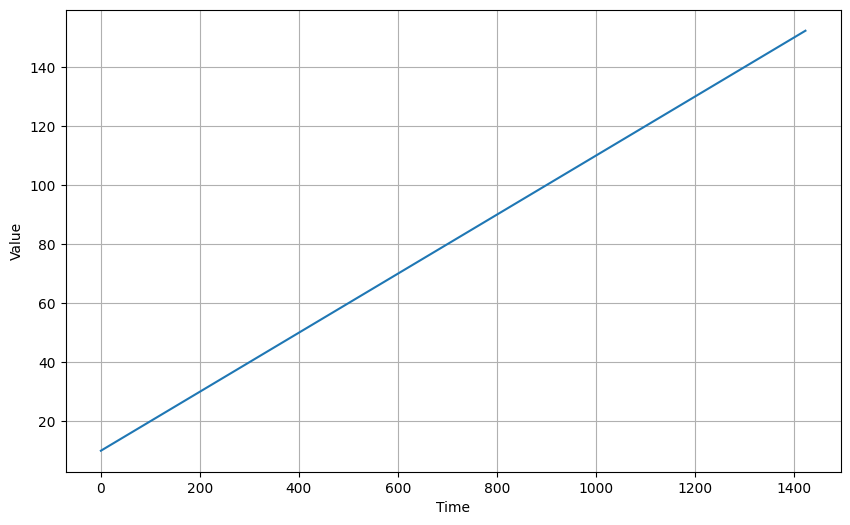

In [5]:
#create a time serie

time = np.arange(4 * 356 + 1)
baseline = 10
series = baseline + trend(time, 0.1)


#plot it
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [6]:
time

array([   0,    1,    2, ..., 1422, 1423, 1424])

In [7]:
series

array([ 10. ,  10.1,  10.2, ..., 152.2, 152.3, 152.4])

In [8]:
# atime series with seasonal patterns

In [12]:
def seasonal_pattern(season_time):
  return np.where(season_time < 0.4,
                  np.cos(season_time * 2 * np.pi),
                  1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
  #repeats the same pattern at each time
  season_time = ((time + phase) % period) / period
  return amplitude *seasonal_pattern(season_time)

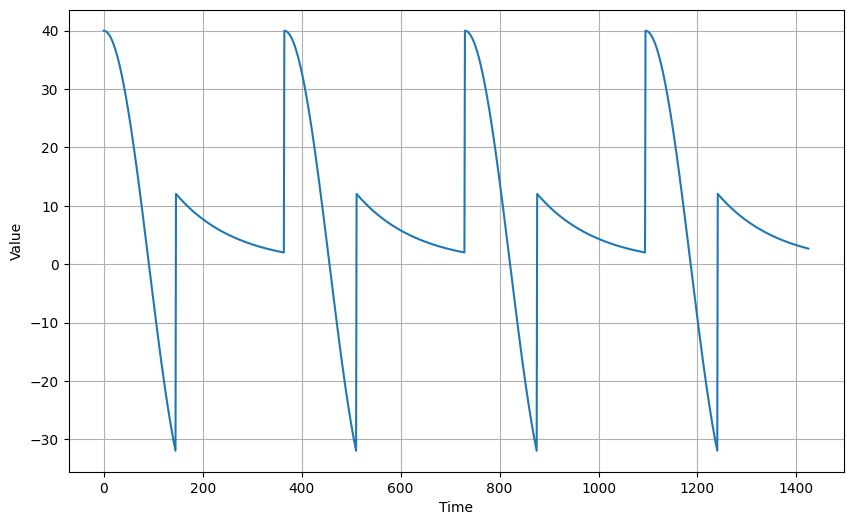

In [13]:
amplitude = 40
series = seasonality(time, period = 365, amplitude = amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

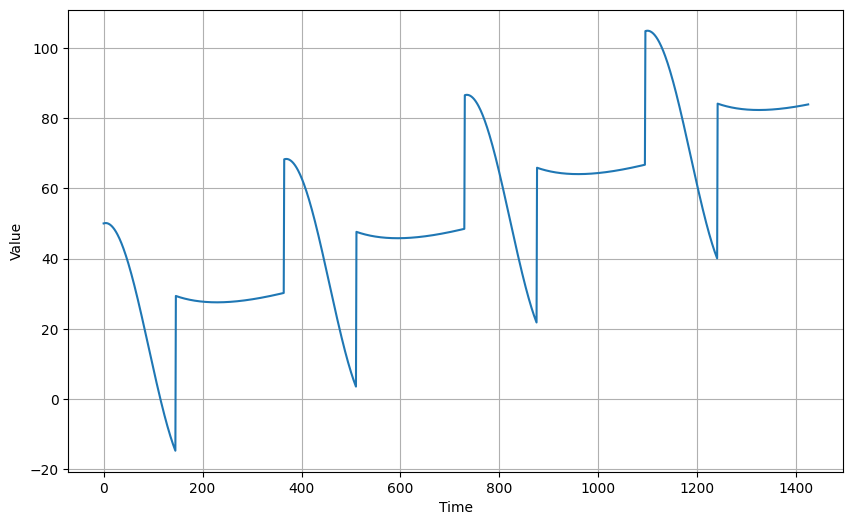

In [14]:
#time series wit both trend and seasonality

slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [15]:
#noise

In [16]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

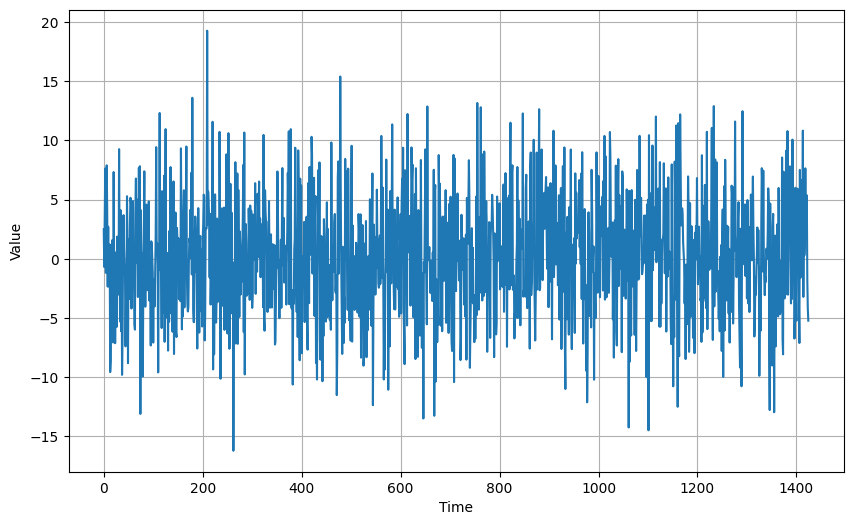

In [17]:
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

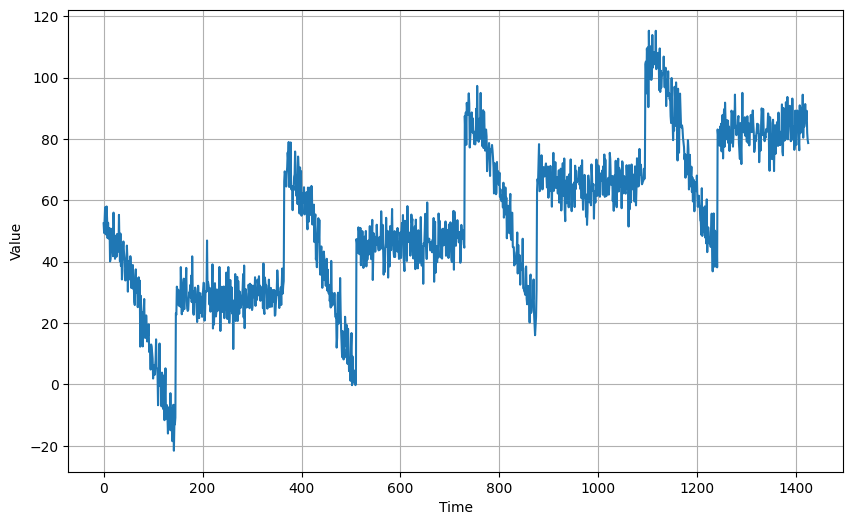

In [18]:
series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()